In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
data = np.array([[-0.98, 2.44],
                 [1.00,-1.51],
                 [2.02,-0.47],
                 [3.03,2.54],
                 [4.00,7.52]
                ])
df = pd.DataFrame(data)
df.columns = ['x','y']
df.describe()

,x,y
count,5.000000,5.0000
mean,1.814000,2.1040
std,1.921505,3.5115
min,-0.980000,-1.5100
25%,1.000000,-0.4700
50%,2.020000,2.4400
75%,3.030000,2.5400
max,4.000000,7.5200


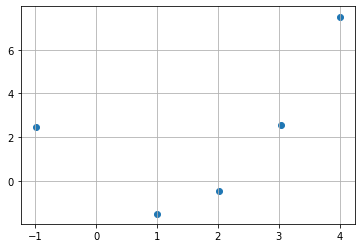

In [8]:
plt.scatter(data[:,0], data[:,1])
plt.grid()

In [9]:
#多項式回帰を実施
degnumber = 4
polynomial_features = PolynomialFeatures(degree = degnumber)
x_poly = polynomial_features.fit_transform(data[:,0].reshape(-1,1)) #指定した次数まで累乗する
reg = LinearRegression()
reg.fit(x_poly, data[:,1])
print(reg.coef_) #係数
print(reg.intercept_) #定数項(切片) 
print(reg.score(x_poly, data[:,1])) #決定係数

[ 0.         -1.9570532   1.07776003 -0.06104475  0.01011992]
-0.5797819891709133
1.0


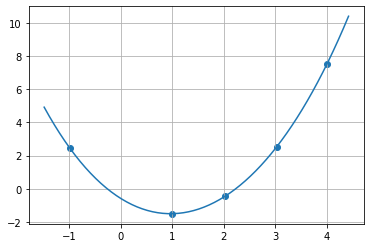

In [10]:
#グラフ描画
plt.scatter(data[:,0],data[:,1])
plt.grid()
x = np.arange(np.min(data[:,0]) - 0.5, np.max(data[:,0]) + 0.5, 0.1) #xの最小値と最大値の0.5余裕をとる
y = reg.predict(polynomial_features.fit_transform(x.reshape(-1,1))) 
plt.plot(x, y)

関数仕様  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html